[4.099456955, 0.060187121, 0.390325315, 1.028398536, 1.371617052, 0.055, -999.0, -999.0, 0.06, 1.1]
0.8 0.055
Mad= 5.24
nodaysLake=2
nodaysRiver=2
KGE: 0.9082043880793021
Beta(bias): 0.9809854412556805
M= 127.66 0.0
k_P= 0.011364 0.002295 0.000932 0.000369 7.0e-5
Mean(Qsim)= 4.987063114184486
55.4
KGE=0.908
NSE=0.823
bias=0.981
Pkorr=1.028
Time elapsed[s]= 32.3559851


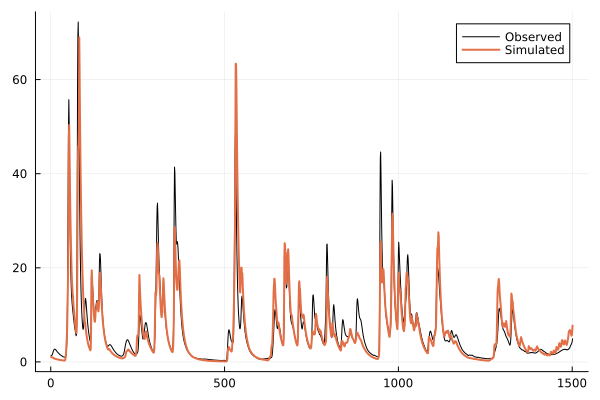

In [1]:
"""
Runs DDD model either in single run model or for calibration
The model itself is called as a function which calls on several functions
This one is for ECCO use not MRT and not operative or HSO
"""
#using CSV
using Distributions
using LsqFit
using Statistics
using Dates
using DataFrames
using Plots
using CSV
using BlackBoxOptim
using JLD2

##Preprocessing routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\Big2SmallLambda.jl")
#include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\CeleritySubSurface_DupBous.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\CeleritySubSurface.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SingleUH.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SingleNormalUH.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerEstimation.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\PyrAreas.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GrWPoint.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\RiverPoint.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TemperatureVector.jl")

##EB and Snow Routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NedbEBGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SnowpackTemp.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TempstartUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SmeltEBGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\CloudCoverGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TssDewpoint.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SolradTransAlbedoper_hrs_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LongWaveRad_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SensibleLatHeat_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\AlbedoUEB_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GroundPrecCC.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SnowGamma.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\Varc.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NewSnowDensityEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NewSnowSDEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DensityAge.jl")

#Subsurface and Evaporation routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerCapacityUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\PotentialEvapPT.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\UnsaturatedEvapEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerEvap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\UnsaturatedExEvap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\WetlandsEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GrvInputDistributionICap2022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\OFICap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\BogLayerUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\RiverUpdate.jl")
## Overland Flow routine
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\OverlandFlowDynamicDD.jl")
## Efficiency criteria
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NSE_ths.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\KGE_ths.jl")
# Model Module
#include("F:\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DDDUrbanFunc.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DDDAllTerrain22012024.jl") #This one for ECCO use not MRT
########################################################################################

catchment = "55.4"  # stationnumber
navn = "Royknes"

TR = "3h"         # this is just a marker for naming files, does NOT set the temporal resolution

ptqfile = string("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDD3h\\inndataV2\\",catchment,"\\",
    catchment,"_",TR,"_ptq_DDDv2_kal.csv") 
#ptqfile = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\utdata\\",navn,"\\SimTimeseries\\FraHSO\\",
#    "Royknes_noDatetime_7a565a2c-f20d-459c-ae55-a631d4a6dc33_3H_ptq.csv") 

r2fil = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\utdata\\",navn,"\\r2_",
    catchment,"_",TR,"_test.csv")

utfile = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\utdata\\",navn,"\\simres_",
    catchment,"_",TR,"_DDDv2.csv")  

paramfile = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\DDDurbanParameters\\",catchment,"\\ParDDDv2_",
    catchment,"_3h.csv")

spinup = (31*4) #days used to spin up the model. 

prm = CSV.read(paramfile,DataFrame,header=["Name", "val"], delim=';')
#prm = CSV.read(paramfile,header=["Name", "val"], delim=';')

#            u,          pro           TX,         Pkorr        skorr,     GscInt      OVP          
#         OVIP       Lv            rv        
tprm = [prm.val[20], prm.val[21], prm.val[22], prm.val[18], prm.val[19],prm.val[33], prm.val[34], 
    prm.val[35],prm.val[36],prm.val[37]]
println(tprm)


Gshape, Gscale = Big2SmallLambda(prm.val[32], prm.val[33]) # Coverting integrated celerity to layers takes too long in calibration: preprocessing
Gpar = [Gshape, Gscale]

println(prm.val[32]," ", prm.val[33])

startsim = 1 
kal = 0
modstate = 0
savestate = 0

t1= time_ns()

function calib_wrapper_model(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate, kal, spinup)
 qobs, qberegn, KGE, NSE, bias = DDDAllTerrain(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate,
        kal, spinup)  
 return qobs,qberegn, KGE,NSE,bias 
end

function calib_single_wsh(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate, kal, spinup)
 qobs, qberegn, KGE, NSE, bias = DDDAllTerrain(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate,
        kal, spinup)    
 return (1.0 - KGE)
end

if(kal == 0)
    qobs,qberegn,KGE,NSE, bias = calib_wrapper_model(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil,
        modstate, savestate,kal, spinup) # a single run 
    
    println(catchment)
    println("KGE=",round(KGE,digits=3))
    println("NSE=",round(NSE,digits=3))
    println("bias=",round(bias,digits=3))
end

if(kal == 1) # calibrate
    #                   u,        pro,         TX,        Pkorr,    skorr,          GscInt,         OVP     OVIP 
    param_range = [(1.0,3.0), (0.05,0.05), (-0.5, 0.5), (0.5, 2.0), (0.5,2.0), (0.065,0.075), (tprm[7],tprm[7]),
        (tprm[8],tprm[8]), (tprm[9],tprm[9]),(tprm[10],tprm[10])] # 
    
    println(param_range)
    calib_single_wsh_tmp(param) = calib_single_wsh(Gpar,startsim, param, prm, ptqfile, utfile, r2fil,
                                           modstate, savestate, kal, spinup)
    res = bboptimize(calib_single_wsh_tmp; SearchRange = param_range, MaxSteps = 1000, TraceMode = :verbose)
    param_hydro = best_candidate(res)
    println(param_hydro)
end

t2 = time_ns()
println("Pkorr=", round(tprm[4],digits=3))
println("Time elapsed[s]= ",(t2-t1)/1.0e9)

if(kal==0)
 plot(qobs[6500:8000], color="black",label = "Observed",lw =1)
 plot!(qberegn[6500:8000],col= "blue",label = "Simulated", lw = 2)
end 
 

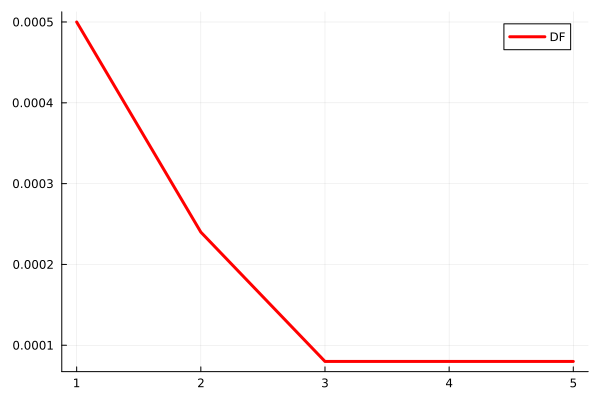

In [1]:
#function CeleritySubSurface(NoL, Gshape, Gscale, midDL, Timeresinsec) 

 using Distributions  
 using Plots
  NoL = 5
  Gshape = 4.0
  meanVel =0.00012
  midDL = 129.84 
  Timeresinsec = 10800
  a = 3 # rapid layer multiplier for DF aquifers
  Gscale = meanVel*Timeresinsec/(Gshape*midDL) 

k = zeros(Float64,NoL)                   #celerity of subsurface (and overland) flow
probvec = zeros(Float64,NoL)            #all leves and overland flow level

dp = 1/(NoL-1)                              #Overland flow level (nol=1], fixed celerity and extremely high capacity(2000 mm)

for i in reverse(1:(NoL-1))
    probvec[i+1] = i*dp - dp/2                #celerities are estimated at center of level, hence dp/2
end

probvec = 1 .- probvec
probvec[1] = 0.99                            #Quantile in celerity distribution for overland flow fixed at 0.99

g = Gamma(Gshape, Gscale)    
k[1:NoL] = quantile.(g,probvec[1:NoL])*midDL/Timeresinsec
##Dupuit Forschheimer 
k[NoL] = 4*meanVel/(3+a) 
k[4] = 4*meanVel/(3+a) 
k[3] = 4*meanVel/(3+a) 
k[2] = k[3]*a
k[1] = 0.0005

#plot(k[1:NoL], color="black",label = string("Shape=",Gshape),lw =1)
#plot!(k[1:NoL], color="green",label = string("Shape=",Gshape),lw =1)
plot!(k[1:NoL], color="red",label = string("DF"),lw =3)
# plot!(qberegn[5000:7000],col= "blue",label = "Simulated", lw = 2)

#return k                        #Celerities [m/s] 
#end

In [7]:
 using Distributions
 include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SingleUH.jl")
#Røykenes
  GshInt = 0.8
  GscInt = 0.055 
  midDL = 156.07
  maxDl = 928
  MAD = 5.24
  Timeresinsec = 10800
  NoL = 2
  area2 = 50090000 
  gtcel = 0.99
 
mLam = GshInt*GscInt
varLam = GshInt*(GscInt)^2                           #Yevjevich p.145
meanIntk = mLam*midDL/Timeresinsec                   #mean celerity estimated through Integrated Celerity
antBox = Int(trunc(maxDl/(meanIntk*Timeresinsec)))+1 #Temporal length UH_MAD
UH_MAD = zeros(Float64,antBox)
sRes = zeros(Float64,antBox) # saturation sum

#Unit hydrograph for MAD
UH_MAD = SingleUH(meanIntk,Timeresinsec, midDL, maxDl, 0)

StSt = (1000*MAD*Timeresinsec)/(area2)         # Steady state Input eq. output in mm
sRes[1] = 0
sRes[2:antBox] .= StSt.*UH_MAD[2:antBox]

for i in 3: antBox
  sRes[i:antBox] .= sRes[i:antBox] + StSt.*UH_MAD[i:antBox]
end

mRes = sum(sRes)
Fact = mLam/mRes
stdRes = (varLam/Fact^2)^0.5                   # see Haan p.51

GshRes =  1.83 #mRes^2/stdRes^2
GscRes =  11.43 #stdRes^2/mRes

MLev = [1/(NoL-1):1/(NoL-1):1.0;]              # (sequence)Quantiles  to calculate reservoir levels [0.1:0.1:0.9;]

MLev[NoL-1] = gtcel                            # quantile for start overland flow
Res_prob = zeros(Float64,(NoL-1))
Magkap = zeros(Float64,NoL)
g = Gamma(GshRes,GscRes) 
#calculates the reservoir levels associated with quantiles. Mean is GshRes*GscRes
Res_prob .= quantile.(g,MLev)

#Capasity of Layers
ssRes1 = zeros(Float64,NoL)
ssRes1[1] = 2000                               # capacity of overland flow level

for i in 2:(NoL-1)
  ssRes1[i] = Res_prob[NoL-i+1]-Res_prob[(NoL-i)]
end

ssRes1[NoL] = Res_prob[1]                     # capasity for the first slowest level         
                       
Magkap = ssRes1                                 # capasity for Layers
M = Res_prob[(NoL-1)]                           # Total groundwater reservoir
println(GshRes) 
println(GscRes)
println("Magkap fra Subrutine ",Magkap)
println("M fra Subrutine ", M)

1.83
11.43
Magkap fra Subrutine [2000.0, 72.21658698613973]
M fra Subrutine 72.21658698613973


In [11]:
NoL = 2
GshRes =  1.83 #mRes^2/stdRes^2
GscRes =  11.43 #stdRes^2/mRes
gtcel = 0.99

MLev = [1/(NoL-1):1/(NoL-1):1.0;]              # (sequence)Quantiles  to calculate reservoir levels [0.1:0.1:0.9;]

MLev[NoL-1] = gtcel                            # quantile for start overland flow
Res_prob = zeros(Float64,(NoL-1))
Magkap = zeros(Float64,NoL)
g = Gamma(GshRes,GscRes) 
#calculates the reservoir levels associated with quantiles. Mean is GshRes*GscRes
Res_prob .= quantile.(g,MLev)

#Capasity of Layers
ssRes1 = zeros(Float64,NoL)
ssRes1[1] = 2000                               # capacity of overland flow level

for i in 2:(NoL-1)
  ssRes1[i] = Res_prob[NoL-i+1]-Res_prob[(NoL-i)]
end

ssRes1[NoL] = Res_prob[1]                     # capasity for the first slowest level         
                       
Magkap = ssRes1                                 # capasity for Layers
M = Res_prob[(NoL-1)]                           # Total groundwater reservoir
println(GshRes) 
println(GscRes)
println("Magkap fra Subrutine ",Magkap)
println("M fra Subrutine ", M)

1.83
11.43
Magkap fra Subrutine [2000.0, 72.21658698613973]
M fra Subrutine 72.21658698613973
